In [9]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Input, Dense, Subtract, Activation, Dropout
from keras.models import Model

In [10]:
N = 500
D = 2
X_1 = 2 * np.random.uniform(size = (N, D))
X_2 = np.random.uniform(size = (N, D))
y = np.ones((X_1.shape[0], 1))

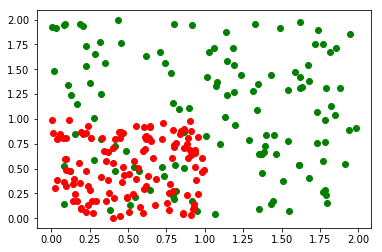

In [11]:
plt.figure(1)
plt.plot(X_1[::4,0], X_1[::4,1], 'go')
plt.plot(X_2[::4,0], X_2[::4,1], 'ro')
plt.savefig('rankdata.jpg', dpi=600)
plt.show()

In [20]:
# Input
pos_in = Input((D,))
neg_in = Input((D,))

# Layers
h1 = Dense(10, activation='relu', kernel_initializer='glorot_uniform')
drop = Dropout(0.1)
h2 = Dense(5, activation='relu', kernel_initializer='glorot_uniform')
out = Dense(1, activation='relu', kernel_initializer='glorot_uniform')

nn_layers = [h1, drop, h2, drop, out]

# Run each through network
def run_through_net(input_layer, layer_list):
    output = layer_list[0](input_layer)
    for layer in layer_list[1:]:
        output = layer(output)
    return output

pos_out = run_through_net(pos_in, nn_layers)
neg_out = run_through_net(neg_in, nn_layers)

# Subtract & squash
diff = Subtract()([pos_out, neg_out])

prob = Activation("sigmoid")(diff)

In [21]:
model = Model(inputs=[pos_in, neg_in], outputs=prob)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
model.fit([X_1, X_2], y, epochs=20, verbose=1)

Epoch 1/20
500/500 [==============================] - 0s 56us/step - loss: 0.2680 - acc: 0.8160
Epoch 2/20
500/500 [==============================] - 0s 53us/step - loss: 0.2596 - acc: 0.8300
Epoch 3/20
500/500 [==============================] - 0s 50us/step - loss: 0.2589 - acc: 0.8240
Epoch 4/20
500/500 [==============================] - 0s 55us/step - loss: 0.2569 - acc: 0.8220
Epoch 5/20
500/500 [==============================] - 0s 53us/step - loss: 0.2585 - acc: 0.8320
Epoch 6/20
500/500 [==============================] - 0s 45us/step - loss: 0.2617 - acc: 0.8260
Epoch 7/20
500/500 [==============================] - 0s 47us/step - loss: 0.2507 - acc: 0.8160
Epoch 8/20
500/500 [==============================] - 0s 45us/step - loss: 0.2551 - acc: 0.8240
Epoch 9/20
500/500 [==============================] - 0s 47us/step - loss: 0.2498 - acc: 0.8240
Epoch 10/20
500/500 [==============================] - 0s 45us/step - loss: 0.2508 - acc: 0.8260
Epoch 11/20
500/500 [==================

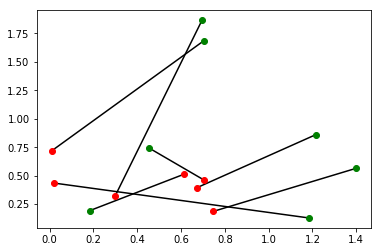

In [33]:
M = 7
X_1_test = 2 * np.random.uniform(size = (M, D))
X_2_test = np.random.uniform(size = (M, D))

colors = np.greater(model.predict([X_1_test,X_2_test]), 0.5)

plt.figure(0)
for i in range(M):
    plt.plot([X_1_test[i,0],X_2_test[i,0]],[X_1_test[i,1],X_2_test[i,1]], 'k-')
    if colors[i]:
        plt.plot(X_1_test[i,0],X_1_test[i,1], 'go')
        plt.plot(X_2_test[i,0],X_2_test[i,1], 'ro')
    else:
        plt.plot(X_1_test[i,0],X_1_test[i,1], 'ro')
        plt.plot(X_2_test[i,0],X_2_test[i,1], 'go')
plt.savefig('ranktest.jpg', dpi=500)
plt.show()

# Ranking individual points

In [34]:
# Work with single examples

singleton_in = Input((D,))
s = h1(singleton_in)
s = h2(s)
s_out = out(s)
single_model = Model(inputs=singleton_in, outputs=s_out)

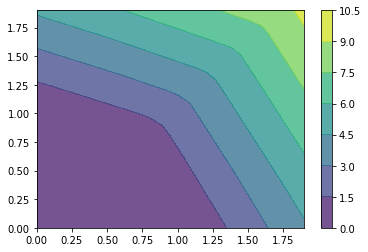

In [35]:
# Vis 'score gradient'
x_min, x_max = 0, 2
y_min, y_max = 0, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = single_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(2)

cf = plt.contourf(tuple(xx), tuple(yy), Z, alpha=0.75, cmap='viridis')
plt.colorbar()
#plt.scatter(X[:, 0], X[:, 1], c=y,
#                                  s=20, edgecolor='k')
plt.savefig('gradientordering.jpg', dpi=700)
plt.show()

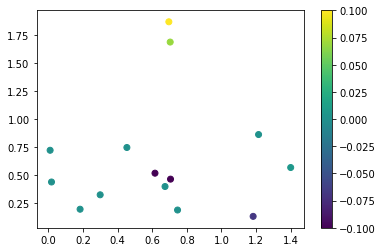

In [36]:
# Single examples- note how the scores tend to preserve 'good/bad' pairs **and** produce
# meaningful rankings between what would have been simply 'good/good' pairs
plt.figure(3)
colors1 = single_model.predict(X_1_test).reshape((X_1_test.shape[0],))
colors2 = single_model.predict(X_2_test).reshape((X_2_test.shape[0],))
plt.scatter(X_1_test[:,0].tolist(), X_1_test[:,1].tolist(), c=colors1, cmap='viridis')
plt.scatter(X_2_test[:,0].tolist(), X_2_test[:,1].tolist(), c=colors2, cmap='viridis')
plt.colorbar()
plt.savefig('pointordering.jpg', dpi=700)
plt.show()

# Spaghetti code for all in one figure

<Figure size 432x288 with 0 Axes>

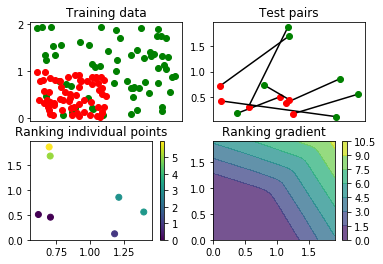

In [37]:
# all in one figure
plt.figure(11)
f, axarr = plt.subplots(2,2)
obj2 = axarr[0,1]
obj2.set_title("Test pairs")
obj2.set_xticks([])
for i in range(M):
    obj2.plot([X_1_test[i,0],X_2_test[i,0]],[X_1_test[i,1],X_2_test[i,1]], 'k-')
    if colors[i]:
        obj2.plot(X_1_test[i,0],X_1_test[i,1], 'go')
        obj2.plot(X_2_test[i,0],X_2_test[i,1], 'ro')
    else:
        obj2.plot(X_1_test[i,0],X_1_test[i,1], 'ro')
        obj2.plot(X_2_test[i,0],X_2_test[i,1], 'go')
#plt.savefig('ranktest.jpg', dpi=600)
obj1 = axarr[0,0]
obj1.set_title("Training data")
obj1.set_xticks([])

skip = 8
obj1.plot(X_1[::skip,0], X_1[::skip,1], 'go')
obj1.plot(X_2[::skip,0], X_2[::skip,1], 'ro')

obj4 = axarr[1,1]
cf = obj4.contourf(tuple(xx), tuple(yy), Z, alpha=0.75)
plt.colorbar(cf, ax=obj4)
obj4.set_title("Ranking gradient")

colorsc = single_model.predict(X_1_test).reshape((X_1_test.shape[0],))

obj3 = axarr[1,0]
obj3.set_title("Ranking individual points")
sc = obj3.scatter(X_1_test[:,0].tolist(), X_1_test[:,1].tolist(), c=colorsc)
plt.colorbar(sc, ax=obj3)
plt.savefig('together.jpg', dpi=800)